# Managing libraries

In [1]:
%%capture
!pip install scikit-learn
!pip install missingno
!pip install xgboost
!pip install imbalanced-learn
!pip install fancyimpute
!pip install tensorflow
!pip install tabulate
!pip install statsmodels
!pip install lightgbm
#!pip install yellowbrick
!pip install scikit-optimize

In [1]:
# Import necessary libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier


from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

import lightgbm as lgb

# Preparing data

In [20]:
# Anxiety ------------------------------------
# loading feature engineered variables
anx_data=pd.read_csv('df_anx_t6_2.csv')

seed = 42 

# Loading in data
X_anx = anx_data.iloc[:, :-1]
y_anx = anx_data.iloc[:, -1]


# Distressed ---------------------------------
# loading feature engineered variables
dis_data=pd.read_csv('data_2.csv')

seed = 42 

# Loading in data
X_dis = dis_data.iloc[:, :-1]
y_dis = dis_data.iloc[:, -1]

# Removing index column
X_dis = X_dis.drop(X_dis.columns[0], axis=1)

# Using best selected features from preprocessing document for Anxiety and Distressed
selected_features = ['ucla_t6_sum', 'summary_score_kccq_base', 'eq5d5l_index_t6', 'MCS_t6', 'ImplWeight', 'personality_type_D']
X_anx_selected = X_anx[selected_features]

selected_features = ['ucla_t6_sum', 'eq5d5l_index_t6', 'depression_base_score', 'icdc_t6_sum', 'MCS_t6', 'Return_to_function_t6', 'age', 'anxiety_base_score']
X_dis_selected = X_dis[selected_features]


# Defining functions

## Function for calculating performance metrics

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score, log_loss, cohen_kappa_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

def fold_analyzer_cv(classifier, scaler, imputer, X_anx_selected, y_anx, fold=1):
    # Define pipeline
    pipeline = Pipeline(steps=[
        ('Scaler', scaler),
        ('Simple', imputer),
        ('Classifier', classifier)
    ])

    # Defining data and labels
    X = X_anx_selected.values  # Convert DataFrame to numpy array
    y = y_anx.values  # Convert Series to numpy array

    # Initializing stratified k-fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initializing lists to store metrics for each fold
    metrics = {
        "accuracy": [],
        "recall_0": [],
        "recall_1": [],
        "precision_0": [],
        "precision_1": [],
        "f1_0": [],
        "f1_1": [],
        "recall_macro": [],
        "precision_macro": [],
        "f1_macro": [],
        "roc_auc": [],
        "prc_auc": [],
        "log_loss": [],
    }

    # Initializing variables to store fold-specific datasets
    X_train_fold, X_val_fold = None, None
    y_train_fold, y_val_fold = None, None

    # Keeping track of the fold number
    fold_number = 1

    # Performing cross-validation
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Training model on the training data
        pipeline.fit(X_train, y_train)

        # Making predictions on the validation data
        y_pred = pipeline.predict(X_val)
        y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

        # Calculating and storing metrics
        metrics["accuracy"].append(accuracy_score(y_val, y_pred))
        metrics["recall_0"].append(recall_score(y_val, y_pred, pos_label=0))
        metrics["recall_1"].append(recall_score(y_val, y_pred, pos_label=1))
        metrics["precision_0"].append(precision_score(y_val, y_pred, pos_label=0))
        metrics["precision_1"].append(precision_score(y_val, y_pred, pos_label=1))
        metrics["f1_0"].append(f1_score(y_val, y_pred, pos_label=0))
        metrics["f1_1"].append(f1_score(y_val, y_pred, pos_label=1))
        metrics["recall_macro"].append(recall_score(y_val, y_pred, average='macro'))
        metrics["precision_macro"].append(precision_score(y_val, y_pred, average='macro'))
        metrics["f1_macro"].append(f1_score(y_val, y_pred, average='macro'))
        metrics["roc_auc"].append(roc_auc_score(y_val, y_pred_proba))
        metrics["prc_auc"].append(average_precision_score(y_val, y_pred_proba))
        metrics["log_loss"].append(log_loss(y_val, y_pred_proba))

        # Printing out performance metrics
        print(f"Metrics for fold {fold_number}:")
        print(f"  Accuracy: {metrics['accuracy'][-1]}")
        print(f"  Recall class 0: {metrics['recall_0'][-1]}")
        print(f"  Recall class 1: {metrics['recall_1'][-1]}")
        print(f"  Precision class 0: {metrics['precision_0'][-1]}")
        print(f"  Precision class 1: {metrics['precision_1'][-1]}")
        print(f"  F1 class 0: {metrics['f1_0'][-1]}")
        print(f"  F1 class 1: {metrics['f1_1'][-1]}")
        print(f"  Recall (macro): {metrics['recall_macro'][-1]}")
        print(f"  Precision (macro): {metrics['precision_macro'][-1]}")
        print(f"  F1 (macro): {metrics['f1_macro'][-1]}")
        print(f"  ROC-AUC: {metrics['roc_auc'][-1]}")
        print(f"  PRC-AUC: {metrics['prc_auc'][-1]}")
        print(f"  Log-Loss: {metrics['log_loss'][-1]}")
        print("-"*70)

        # Saving data for the specified fold
        if fold_number == fold:
            X_train_fold, X_val_fold = X_train, X_val
            y_train_fold, y_val_fold = y_train, y_val
            # Scaled and imputed for SHAP
            X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train_fold), columns=X_anx_selected.columns)
            X_val_scaled = scaler.transform(X_val_fold)
            X_train_imputed = imputer.fit_transform(X_train_scaled)
            X_val_imputed = imputer.transform(X_val_scaled)

        fold_number += 1

    # Calculating the average and standard deviation of each metric across all folds
    average_metrics = {key: np.mean(values) for key, values in metrics.items()}
    std_metrics = {key: np.std(values) for key, values in metrics.items()}

    print("Average metrics across all folds:")
    for key, value in average_metrics.items():
        print(f"  {key}: {value:.4f} ± {std_metrics[key]:.4f}")

    # Returning the average and standard deviation metrics dictionary and the fold-specific data
    return (average_metrics, std_metrics), X_train_fold, X_val_fold, y_train_fold, y_val_fold, X_train_imputed, X_val_imputed

# Defining models

## Anxiety

In [22]:
# Best model for anxiety
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

# Defining preprocessing steps
scaler = RobustScaler()
imputer = SimpleImputer()

# Defining stratified k-fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

anx_models_comb = [ # best base-learnrers for stacking ensemble - with best params from Hypertuning
    ('Random Forest', RandomForestClassifier(class_weight='balanced', max_depth=None, max_features='log2', min_samples_leaf=3, min_samples_split=7, n_estimators=90, random_state=42)),
    ('SVM', SVC(C=1.0, class_weight=None, coef0=0.05, degree=12, gamma='auto', kernel='rbf', max_iter=7000, probability=True, shrinking=True, random_state=42)),
    ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=5, p=1, weights='uniform', n_jobs=-1)),
    ('XGB', xgb.XGBClassifier(colsample_bytree=0.9, learning_rate=0.4, max_depth=3, min_child_weight=1, n_estimators=162, subsample=0.9, random_state=42, n_jobs=-1)),
]

# Creating the stacking classifier with SVM as final estimator
svm_model = SVC(C=1.0, kernel='rbf', degree=14, gamma='scale', coef0=0.05, shrinking=True, probability=True, class_weight=None, max_iter=7000, random_state=42)
stacking_clf = StackingClassifier(estimators=anx_models_comb, final_estimator=svm_model, cv=stratified_kfold)

# Defining pipeline
pipeline_anx = Pipeline(steps=[
    ('Robust', scaler),
    ('Simple', imputer),
    ('classifier', stacking_clf)
])

# Defining classifier with best params
rf_classifier = RandomForestClassifier(class_weight='balanced', max_depth=None, max_features='log2', min_samples_leaf=3, min_samples_split=7, n_estimators=90, random_state=42)

# Defining pipeline
pipeline_rf = Pipeline(steps=[
    ('Robust', scaler),
    ('Simple', imputer),
    ('classifier', rf_classifier)
])


## Distressed

In [11]:
# Defining preprocessing methods
scaler = MinMaxScaler()
imputer = SimpleImputer()

# Best model - Distressed present detection
LGBM = lgb.LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=0.7, learning_rate=0.2, max_depth=2, n_estimators=87, num_leaves=3, objective='binary', random_state=42, n_jobs=-1, verbose=-1)

# Defining pipeline
pipeline_dis = Pipeline(steps=[
    ('MinMax', scaler),
    ('Simple', imputer),
    ('classifier', LGBM)
])

# Model evaluation cv

## Anxiety

In [28]:
# Defining preprocessing methods 
scaler = RobustScaler()
imputer = SimpleImputer()

anx_models_comb = [ # best base-learnrers for stacking ensemble
    ('Random Forest', RandomForestClassifier(class_weight='balanced', max_depth=None, max_features='log2', min_samples_leaf=3, min_samples_split=7, n_estimators=90, random_state=42)),
    ('SVM', SVC(C=1.0, class_weight=None, coef0=0.05, degree=12, gamma='auto', kernel='rbf', max_iter=7000, probability=True, shrinking=True, random_state=42)),
    ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=5, p=1, weights='uniform', n_jobs=-1)),
    ('XGB', xgb.XGBClassifier(colsample_bytree=0.9, learning_rate=0.4, max_depth=3, min_child_weight=1, n_estimators=162, subsample=0.9, random_state=42, n_jobs=-1)),
]

# Creating the stacking classifier with SVM as final estimator
svm_model = SVC(C=1.0, kernel='rbf', degree=14, gamma='scale', coef0=0.05, shrinking=True, probability=True, class_weight=None, max_iter=7000, random_state=42)
stacking_clf = StackingClassifier(estimators=anx_models_comb, final_estimator=svm_model, cv=stratified_kfold)

# Function call
average_metrics, X_train_fold, X_val_fold, y_train_fold, y_val_fold, X_train_imputed, X_val_imputed = fold_analyzer_cv(stacking_clf, scaler, imputer, X_anx_selected, y_anx, fold=3)

Metrics for fold 1:
  Accuracy: 0.9791666666666666
  Recall class 0: 0.9887640449438202
  Recall class 1: 0.8571428571428571
  Precision class 0: 0.9887640449438202
  Precision class 1: 0.8571428571428571
  F1 class 0: 0.9887640449438202
  F1 class 1: 0.8571428571428571
  Recall (macro): 0.9229534510433386
  Precision (macro): 0.9229534510433386
  F1 (macro): 0.9229534510433386
  ROC-AUC: 0.8715890850722311
  PRC-AUC: 0.7606876485533972
  Log-Loss: 0.09415016975603356
----------------------------------------------------------------------
Metrics for fold 2:
  Accuracy: 0.9791666666666666
  Recall class 0: 1.0
  Recall class 1: 0.7142857142857143
  Precision class 0: 0.978021978021978
  Precision class 1: 1.0
  F1 class 0: 0.9888888888888889
  F1 class 1: 0.8333333333333334
  Recall (macro): 0.8571428571428572
  Precision (macro): 0.989010989010989
  F1 (macro): 0.9111111111111112
  ROC-AUC: 0.9967897271268057
  PRC-AUC: 0.9682539682539683
  Log-Loss: 0.08459932639115912
---------------

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Metrics for fold 4:
  Accuracy: 0.9473684210526315
  Recall class 0: 0.9886363636363636
  Recall class 1: 0.42857142857142855
  Precision class 0: 0.9560439560439561
  Precision class 1: 0.75
  F1 class 0: 0.9720670391061452
  F1 class 1: 0.5454545454545454
  Recall (macro): 0.7086038961038961
  Precision (macro): 0.8530219780219781
  F1 (macro): 0.7587607922803453
  ROC-AUC: 0.5698051948051948
  PRC-AUC: 0.49491297367843573
  Log-Loss: 0.20884613045562628
----------------------------------------------------------------------
Metrics for fold 5:
  Accuracy: 1.0
  Recall class 0: 1.0
  Recall class 1: 1.0
  Precision class 0: 1.0
  Precision class 1: 1.0
  F1 class 0: 1.0
  F1 class 1: 1.0
  Recall (macro): 1.0
  Precision (macro): 1.0
  F1 (macro): 1.0
  ROC-AUC: 1.0
  PRC-AUC: 0.9999999999999998
  Log-Loss: 0.05138428330163148
----------------------------------------------------------------------
Average metrics across all folds:
  accuracy: 0.9791 ± 0.0176
  recall_0: 0.9955 ± 0.0055

## Distressed

In [29]:
# Defining preprocessing methods 
scaler = MinMaxScaler()
imputer = SimpleImputer()

# Best model - Distressed present detection
LGBM = lgb.LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=0.7, learning_rate=0.2, max_depth=2, n_estimators=87, num_leaves=3, objective='binary', random_state=42, n_jobs=-1, verbose=-1)

# Function call
average_metrics, X_train_fold, X_val_fold, y_train_fold, y_val_fold, X_train_imputed, X_val_imputed = fold_analyzer_cv(LGBM, scaler, imputer, X_dis_selected, y_dis, fold=3)

Metrics for fold 1:
  Accuracy: 0.9583333333333334
  Recall class 0: 0.9772727272727273
  Recall class 1: 0.75
  Precision class 0: 0.9772727272727273
  Precision class 1: 0.75
  F1 class 0: 0.9772727272727273
  F1 class 1: 0.75
  Recall (macro): 0.8636363636363636
  Precision (macro): 0.8636363636363636
  F1 (macro): 0.8636363636363636
  ROC-AUC: 0.9801136363636364
  PRC-AUC: 0.8607954545454546
  Log-Loss: 0.10753929151359509
----------------------------------------------------------------------
Metrics for fold 2:
  Accuracy: 0.9895833333333334
  Recall class 0: 1.0
  Recall class 1: 0.875
  Precision class 0: 0.9887640449438202
  Precision class 1: 1.0
  F1 class 0: 0.9943502824858758
  F1 class 1: 0.9333333333333333
  Recall (macro): 0.9375
  Precision (macro): 0.9943820224719101
  F1 (macro): 0.9638418079096045
  ROC-AUC: 0.9801136363636364
  PRC-AUC: 0.9204545454545454
  Log-Loss: 0.08309525132023657
----------------------------------------------------------------------
Metrics f

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


## RF for Anxiety

In [30]:
# Defining preprocessing methods and classifier
scaler = RobustScaler()
imputer = SimpleImputer()
classifier = RandomForestClassifier(class_weight='balanced', max_depth=None, max_features='log2', min_samples_leaf=3, min_samples_split=7, n_estimators=90, random_state=42)

# Function call
average_metrics, X_train_fold, X_val_fold, y_train_fold, y_val_fold, X_train_imputed, X_val_imputed = fold_analyzer_cv(classifier, scaler, imputer, X_anx_selected, y_anx, fold=3)

Metrics for fold 1:
  Accuracy: 0.9791666666666666
  Recall class 0: 0.9887640449438202
  Recall class 1: 0.8571428571428571
  Precision class 0: 0.9887640449438202
  Precision class 1: 0.8571428571428571
  F1 class 0: 0.9887640449438202
  F1 class 1: 0.8571428571428571
  Recall (macro): 0.9229534510433386
  Precision (macro): 0.9229534510433386
  F1 (macro): 0.9229534510433386
  ROC-AUC: 0.9662921348314607
  PRC-AUC: 0.8513867085295657
  Log-Loss: 0.12627631506270953
----------------------------------------------------------------------
Metrics for fold 2:
  Accuracy: 0.9791666666666666
  Recall class 0: 0.9775280898876404
  Recall class 1: 1.0
  Precision class 0: 1.0
  Precision class 1: 0.7777777777777778
  F1 class 0: 0.9886363636363636
  F1 class 1: 0.875
  Recall (macro): 0.9887640449438202
  Precision (macro): 0.8888888888888888
  F1 (macro): 0.9318181818181819
  ROC-AUC: 0.9919743178170144
  PRC-AUC: 0.8954648526077096
  Log-Loss: 0.07706175178398629
--------------------------

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Metrics for fold 5:
  Accuracy: 0.9894736842105263
  Recall class 0: 0.9886363636363636
  Recall class 1: 1.0
  Precision class 0: 1.0
  Precision class 1: 0.875
  F1 class 0: 0.9942857142857143
  F1 class 1: 0.9333333333333333
  Recall (macro): 0.9943181818181819
  Precision (macro): 0.9375
  F1 (macro): 0.9638095238095239
  ROC-AUC: 0.9983766233766233
  PRC-AUC: 0.982142857142857
  Log-Loss: 0.06951227541991588
----------------------------------------------------------------------
Average metrics across all folds:
  accuracy: 0.9791 ± 0.0116
  recall_0: 0.9865 ± 0.0045
  recall_1: 0.8857 ± 0.1666
  precision_0: 0.9911 ± 0.0130
  precision_1: 0.8370 ± 0.0404
  f1_0: 0.9887 ± 0.0061
  f1_1: 0.8531 ± 0.0981
  recall_macro: 0.9361 ± 0.0826
  precision_macro: 0.9140 ± 0.0235
  f1_macro: 0.9209 ± 0.0521
  roc_auc: 0.9686 ± 0.0420
  prc_auc: 0.8859 ± 0.0978
  log_loss: 0.1605 ± 0.1545


# Yellow brick - Learning curves

In [13]:
%%capture
!pip install yellowbrick

## Stacking (Anxiety)

<Axes: title={'center': 'Learning Curve for StackingClassifier'}, xlabel='Training Instances', ylabel='Score'>

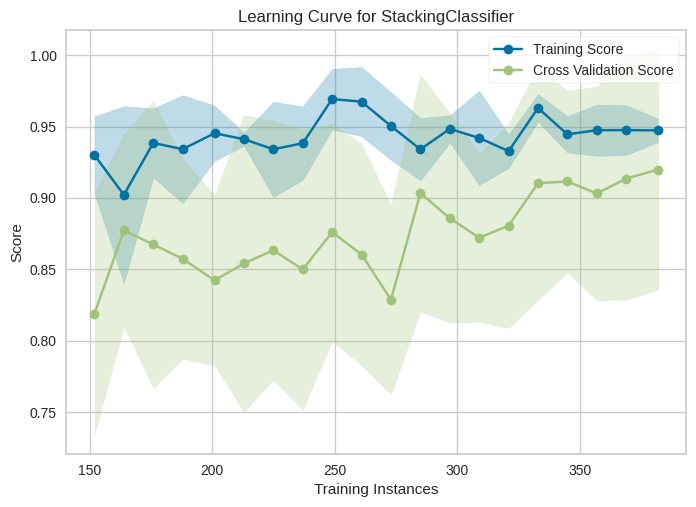

In [15]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Creating the learning curve visualizer
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sizes = np.linspace(0.4, 1.0, 20)

# Instantiating the classification model and visualizer
visualizer = LearningCurve(
    pipeline_anx, cv=stratified_kfold, scoring='f1_macro', train_sizes=sizes, n_jobs=-1,
    xlabel='Training Instances', ylabel='f1-macro'
)

# Fitting the data to the visualizer
visualizer.fit(X_anx_selected, y_anx)

# Saving the plot
visualizer.show(outpath="learning_curve_stacking.png")

  

## RF (Anxiety)

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

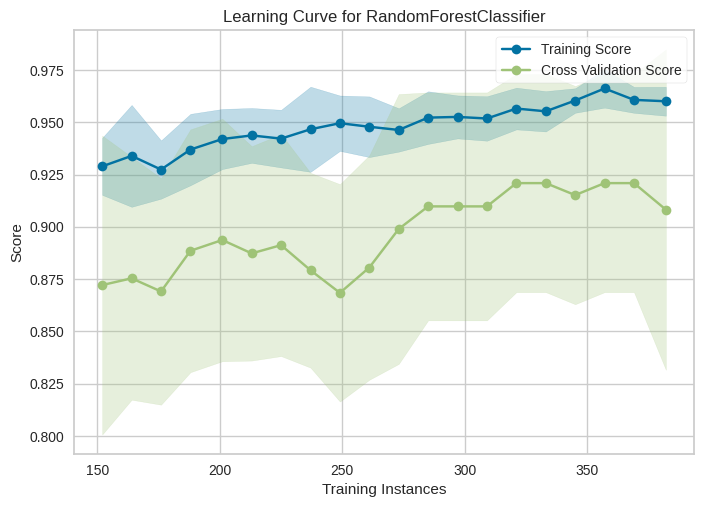

In [17]:
from yellowbrick.model_selection import LearningCurve

# model and preprocessing methods
rf_model = RandomForestClassifier(class_weight='balanced', max_depth=None, max_features='log2', min_samples_leaf=3, min_samples_split=7, n_estimators=90, random_state=42)
scaler = RobustScaler()
imputer = SimpleImputer()

# Defining pipeline
pipeline_rf = Pipeline(steps=[
    ('Robust', scaler),
    ('Simple', imputer),
    ('classifier', rf_model)
])


# Creating the learning curve visualizer
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sizes = np.linspace(0.4, 1.0, 20)

# Instantiating the classification model and visualizer
visualizer = LearningCurve(
    pipeline_rf, cv=stratified_kfold, scoring='f1_macro', train_sizes=sizes, n_jobs=-1,
    xlabel='Training Instances', ylabel='f1-macro'
)

visualizer.fit(X_anx_selected, y_anx)

# Saving the plot
visualizer.show(outpath="learning_curve_RF.png")

In [44]:
np.mean(cross_val_score(pipeline_rf, X_anx_selected, y_anx, cv=stratified_kfold, scoring='f1_macro'))

0.9209040685715605

## LGBM (Distress)

<Axes: title={'center': 'Learning Curve for LGBMClassifier'}, xlabel='Training Instances', ylabel='Score'>

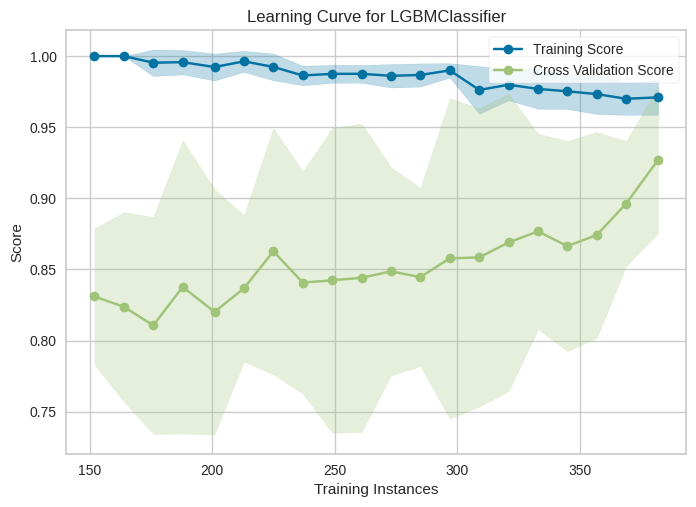

In [18]:
from yellowbrick.model_selection import LearningCurve

# Creating the learning curve visualizer
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sizes = np.linspace(0.4, 1.0, 20)

# Instantiating the classification model and visualizer
visualizer = LearningCurve(
    pipeline_dis, cv=stratified_kfold, scoring='f1_macro', train_sizes=sizes, n_jobs=-1,
    xlabel='Training Instances', ylabel='f1-macro'
)

visualizer.fit(X_dis_selected, y_dis)

# Saving the plot
visualizer.show(outpath="learning_curve_LGBM.png")
  

# PRC-curves

## Stacking (Anxiety)

### Making PRC-curve

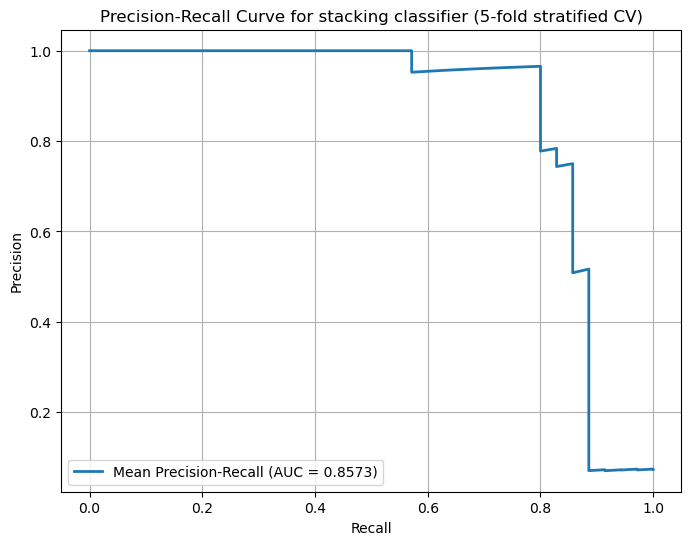

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

X = X_anx_selected
y = y_anx

anx_models_comb = [ # best base-learnrers for stacking ensemble
    ('Random Forest', RandomForestClassifier(class_weight='balanced', max_depth=None, max_features='log2', min_samples_leaf=3, min_samples_split=7, n_estimators=90, random_state=42)),
    ('SVM', SVC(C=1.0, class_weight=None, coef0=0.05, degree=12, gamma='auto', kernel='rbf', max_iter=7000, probability=True, shrinking=True, random_state=42)),
    ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=5, p=1, weights='uniform', n_jobs=-1)),
    ('XGB', xgb.XGBClassifier(colsample_bytree=0.9, learning_rate=0.4, max_depth=3, min_child_weight=1, n_estimators=162, subsample=0.9, random_state=42, n_jobs=-1)),
    # ('LGBM', lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.75, learning_rate=0.1, max_depth=5, n_estimators=20, num_leaves=10, objective='binary', random_state=42, n_jobs=-1, verbose=-1))
]

# Creating the stacking classifier with SVM as final estimator
svm_model = SVC(C=1.0, kernel='rbf', degree=14, gamma='scale', coef0=0.05, shrinking=True, probability=True, class_weight=None, max_iter=7000, random_state=42)
stacking_clf = StackingClassifier(estimators=anx_models_comb, final_estimator=svm_model, cv=stratified_kfold)

# Defining preprocessing steps
scaler = RobustScaler()
imputer = SimpleImputer()

# Defining pipeline
pipeline_stacking = Pipeline(steps=[
    ('Robust', scaler),
    ('Simple', imputer),
    ('classifier', stacking_clf)
])

# Defining stratified k-fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store decision function scores and true labels
decision_scores = []
true_labels = []

# Performing cross-validation and collect decision function scores and true labels
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fitting the model
    pipeline_stacking.fit(X_train, y_train)

    # Predicting decision function scores on the test set
    y_scores = pipeline_stacking.decision_function(X_test)

    # Appending decision function scores and true labels to the lists
    decision_scores.append(y_scores)
    true_labels.append(y_test)

# Concatenating decision function scores and true labels
decision_scores = np.concatenate(decision_scores)
true_labels = np.concatenate(true_labels)

# Computing precision and recall
precision, recall, _ = precision_recall_curve(true_labels, decision_scores)

# Computing AUC for the precision-recall curve
mean_auc = auc(recall, precision)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f'Mean Precision-Recall (AUC = {mean_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for stacking classifier (5-fold stratified CV)')
plt.grid(True)
plt.legend()
plt.show()





### Calculating optimimal decision threshold

In [13]:
from tqdm import tqdm

# Initializing variables to track the highest F1-score and corresponding threshold
best_f1_score = -1
best_threshold = None

# Initializing lists to store F1 scores for each threshold
f1_scores = []

# Iterating over thresholds with a progress bar
for threshold in tqdm(thresholds, desc="Thresholds"):
    # Initializing arrays to store decision function scores and true labels
    decision_scores = []
    true_labels = []
    
    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        # Fitting the model
        pipeline_stacking.fit(X_train, y_train)
    
        # Predicting probabilities on the test set
        y_scores = pipeline_stacking.predict_proba(X_test)[:, 1]
    
        # Converting probabilities to binary predictions using the threshold
        y_pred = (y_scores >= threshold).astype(int)
    
        # Appending true labels to the list
        true_labels.append(y_test)
    
        # Appending binary predictions to the list
        decision_scores.append(y_pred)
    
    # Calculating F1 score for the fold
    f1 = f1_score(np.concatenate(true_labels), np.concatenate(decision_scores))
    
    # Appending F1 score to the list
    f1_scores.append(f1)
    
    # Checking if current F1-score is the highest
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

# Calculating mean F1 score across thresholds
mean_f1_score = np.mean(f1_scores)

print("Best F1-score:", best_f1_score)
print("Corresponding threshold:", best_threshold)


Thresholds: 100%|██████████| 253/253 [22:21<00:00,  5.30s/it]

Best F1-score: 0.875
Corresponding threshold: 0.2598092597576779


In [30]:
decision_scores = []
true_labels = []
threshold = 0.2598092597576779
    
from sklearn.metrics import f1_score
import numpy as np

f1_scores = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    pipeline_stacking.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_scores = pipeline_stacking.predict_proba(X_test)[:, 1]

    # Convert probabilities to binary predictions using the threshold
    y_pred = (y_scores >= threshold).astype(int)

    # Compute F1 score for the current fold
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append F1 score to the list
    f1_scores.append(f1)

# Calculate the mean F1 score across all folds
mean_f1_macro = np.mean(f1_scores)
print(mean_f1_macro)

0.9258665341660759


## RF (Anxiety)

### Making PRC-curve

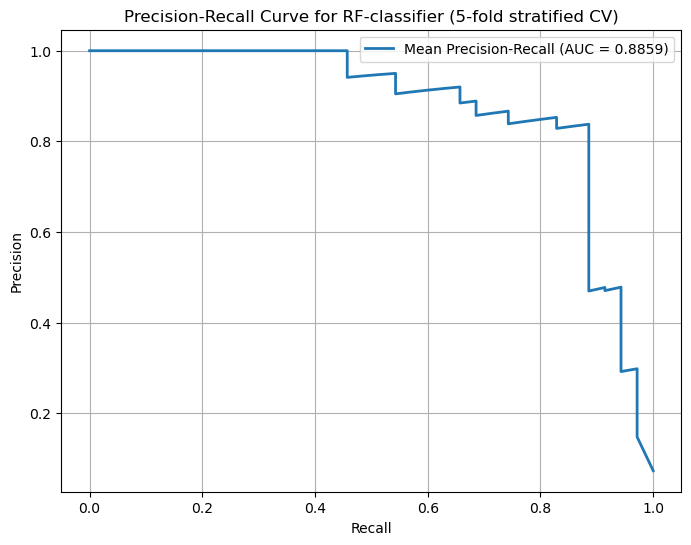

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt

X = X_anx_selected
y = y_anx

# Defining preprocessing steps
scaler = RobustScaler()
imputer = SimpleImputer()

# Defining pipeline with RandomForestClassifier
pipeline = Pipeline(steps=[
    ('Robust', scaler),
    ('Simple', imputer),
    ('classifier', RandomForestClassifier(class_weight='balanced', max_depth=None, max_features='log2', min_samples_leaf=3, min_samples_split=7, n_estimators=90, random_state=42))
])

# Defining stratified k-fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store decision function scores and true labels
decision_scores = []
true_labels = []
prc_auc_values = []

# Performing cross-validation and collect decision function scores and true labels
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fitting the model
    pipeline.fit(X_train, y_train)

    # Predicting probabilities on the test set
    y_scores = pipeline.predict_proba(X_test)[:, 1]

    # Appending decision function scores and true labels to the lists
    decision_scores.append(y_scores)
    true_labels.append(y_test)

    # Calculating PRC AUC for the fold and append to the list
    prc_auc = average_precision_score(y_test, y_scores)
    prc_auc_values.append(prc_auc)

# Concatenating decision function scores and true labels
decision_scores = np.concatenate(decision_scores)
true_labels = np.concatenate(true_labels)

# Computing precision and recall
precision, recall, thresholds = precision_recall_curve(true_labels, decision_scores)

# Calculating mean PRC AUC across folds
mean_prc_auc = np.mean(prc_auc_values)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f'Mean Precision-Recall (AUC = {mean_prc_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RF-classifier (5-fold stratified CV)')
plt.grid(True)
plt.legend()
plt.show()



### Calculating optimal decision threshold

In [61]:
from tqdm import tqdm

# Initializing variables to track the highest F1-score and corresponding threshold
best_f1_score = -1
best_threshold = None

# Initializing lists to store F1 scores for each threshold
f1_scores = []

# Iterating over thresholds with a progress bar
for threshold in tqdm(thresholds, desc="Thresholds"):
    # Initialize arrays to store decision function scores and true labels
    decision_scores = []
    true_labels = []
    
    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        # Fitting the model
        pipeline.fit(X_train, y_train)
    
        # Predicting probabilities on the test set
        y_scores = pipeline.predict_proba(X_test)[:, 1]
    
        # Converting probabilities to binary predictions using the threshold
        y_pred = (y_scores >= threshold).astype(int)
    
        # Appending true labels to the list
        true_labels.append(y_test)
    
        # Appending binary predictions to the list
        decision_scores.append(y_pred)
    
    # Calculating F1 score for the fold
    f1 = f1_score(np.concatenate(true_labels), np.concatenate(decision_scores))
    
    # Appending F1 score to the list
    f1_scores.append(f1)
    
    # Checking if current F1-score is the highest
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

# Calculating mean F1 score across thresholds
mean_f1_score = np.mean(f1_scores)

print("Best F1-score:", best_f1_score)
print("Corresponding threshold:", best_threshold)


Thresholds: 100%|██████████| 186/186 [01:42<00:00,  1.81it/s]

Best F1-score: 0.8611111111111112
Corresponding threshold: 0.5084285564932148


## LGBM (Distress)

### Making PRC-curve

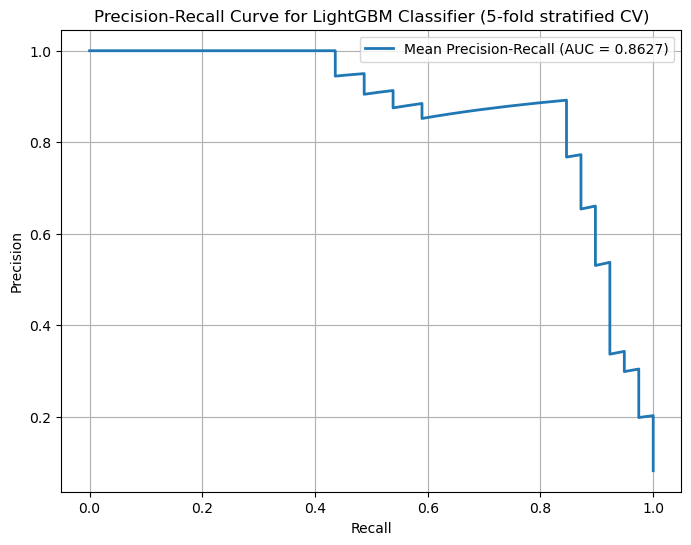

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score

import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

X = X_dis_selected
y = y_dis

# Defining preprocessing methods
scaler = MinMaxScaler()
imputer = SimpleImputer()

# Best model - Distressed present detection
LGBM = lgb.LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=0.7, learning_rate=0.2, max_depth=2, n_estimators=87, num_leaves=3, objective='binary', random_state=42, n_jobs=-1, verbose=-1)

# Defining pipeline
pipeline_dis = Pipeline(steps=[
    ('MinMax', scaler),
    ('Simple', imputer),
    ('classifier', LGBM)
])

# Defining stratified k-fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing lists to store decision function scores and true labels
decision_scores = []
true_labels = []
prc_auc_values = []

# Performing cross-validation and collect decision function scores and true labels
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fitting the model
    pipeline_dis.fit(X_train, y_train)

    # Predicting probabilities of positive class on the test set
    y_scores = pipeline_dis.predict_proba(X_test)[:, 1]

    # Appending decision function scores and true labels to the lists
    decision_scores.append(y_scores)
    true_labels.append(y_test)

    # Calculating PRC AUC for the fold and append to the list
    prc_auc = average_precision_score(y_test, y_scores)
    prc_auc_values.append(prc_auc)

# Concatenating decision function scores and true labels
decision_scores = np.concatenate(decision_scores)
true_labels = np.concatenate(true_labels)

# Computing precision and recall
precision, recall, thresholds = precision_recall_curve(true_labels, decision_scores)

# Calculating mean PRC AUC across folds
mean_prc_auc = np.mean(prc_auc_values)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f'Mean Precision-Recall (AUC = {mean_prc_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LightGBM Classifier (5-fold stratified CV)')
plt.grid(True)
plt.legend()
plt.show()

### Calculating optimal decision threshold

In [10]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score

# Initializing variables to track the highest F1-score and corresponding threshold
best_f1_score = -1
best_threshold = None

# Initializing lists to store F1 scores for each threshold
f1_scores = []

# Iterating over thresholds with a progress bar
for threshold in tqdm(thresholds, desc="Thresholds"):
    # Initializing arrays to store decision function scores and true labels
    decision_scores = []
    true_labels = []
    
    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        # Fitting the model
        pipeline_dis.fit(X_train, y_train)
    
        # Predicting probabilities on the test set
        y_scores = pipeline_dis.predict_proba(X_test)[:, 1]
    
        # Converting probabilities to binary predictions using the threshold
        y_pred = (y_scores >= threshold).astype(int)
    
        # Appending true labels to the list
        true_labels.append(y_test)
    
        # Appending binary predictions to the list
        decision_scores.append(y_pred)
    
    # Calculating F1 score for the fold
    f1 = f1_score(np.concatenate(true_labels), np.concatenate(decision_scores))
    
    # Appending F1 score to the list
    f1_scores.append(f1)
    
    # Checking if current F1-score is the highest
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

# Calculating mean F1 score across thresholds
mean_f1_score = np.mean(f1_scores)

print("Best F1-score:", best_f1_score)
print("Corresponding threshold:", best_threshold)

Thresholds: 100%|██████████| 253/253 [00:31<00:00,  8.02it/s]

Best F1-score: 0.868421052631579
Corresponding threshold: 0.5160066569496967
